<a href="https://colab.research.google.com/github/jai-sundaram/ml_tutorial/blob/main/my_random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

In [ ]:
#ensemble learning
#random forest is a version of ensemble learning
#ensemble learning is when you take multiple algorithms, or take the same algorithm multiple times and put them together to make something much more powerful than the original
#Steps for random forest regression
#fyi: k is just a random variable amount
#Step 1: Pick at random K data points from the Training set
#Step 2: Build the Decision Tree associated to these K data points
#Step 3: Choose the number of trees you want to build and repeat steps 1-2.
#Step 4: For a new data point, make each of the trees predict the value of y for the data point in question, and then assign the new data point the average of all the predicted y values from the trees
#since we are not predicting based off of one tree but rather a 'forest' of trees, the accuracy of the prediction is improved
#furthermore, ensemble alogrithms like this are more stable because any change in the dataset might impact only one tree, rather than the whole forest


## Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [6]:
dataset = pd.read_csv("/content/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:,-1]

## Training the Random Forest Regression model on the whole dataset

In [7]:
#builiding the random forest regression model
from sklearn.ensemble import RandomForestRegressor
#first parameter is the number of the trees
#we will be using 10 trees
#second parameter is random state
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X,y)
#like decision tree regression, the random forest regression model is better adapted to high dimensional datasets (datasets with multiple features)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [8]:
#again, predicting for position level of 6.5
regressor.predict([[6.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


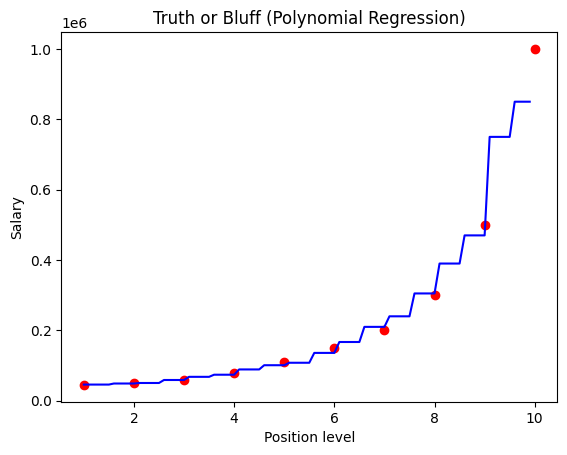

In [10]:
#displaying a graph
#reusing some code from decision tree regression
X_grid = np.arange(min(X['Level'].astype(float)), max(X['Level'].astype(float)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
#in decision tree regression, we only had one step between each position level
#in random forest regression we can see that we have two steps between each position level
#this is because more trees this time, and as a result more splits